[View in Colaboratory](https://colab.research.google.com/github/You-Your-Yu/machine-learning-assignment/blob/master/Shimosaka_fin_1515309_problem2.ipynb)

# Problem 2

## Environmental Setting

In [130]:
!pip install cvxopt

## Learning

In [162]:
import numpy as np
import matplotlib.pyplot as plt

# objective function
def psi(w, A, mu):
  return (w - mu).T.dot(A).dot(w - mu)

# differentiation of psi
def d_psi(w, A, mu):
  return 2 * A.dot(w - mu)

# L1 regularization term
def Omega(w, lm):
  return lm * np.linalg.norm(w, ord=1)

# proximal operator for psi + Omega
def prox(z, lm, lr):
  c = lr * lm
  ret = np.zeros(len(z))
  ret[z >= c] = z[z >= c] - c
  ret[z <= -c] = z[z <= -c] + c
  return ret

# update procedure of proximal gradient method
def update(prev, A, mu, lm, lr) :
  d = d_psi(prev, A, mu)
  curr = prox(prev - lr * d, lm, lr)
  return curr
  
### parameters ###
A = np.array([[3, 0.5], [0.5, 1]])
mu = np.array([1, 2])
lm = 2
eig, vec = np.linalg.eig(2 * A)
lr = 1/ np.max(eig)
fin = 0.0001
w_init = np.array([3, -1])

### learning ###
prev = np.copy(w_init)
log = [prev]
while True:
  curr = update(prev, A, mu, lm, lr)
  log.append(curr)
  #print(curr)
  if np.linalg.norm(curr - prev) <= fin:
    break
  prev = curr

last = log[-1]
print('total steps: {}'.format(len(log)-1))
p =psi(last, A, mu)
O = Omega(last, lm)
print('psi + Omega: {}'.format(p + O))
print ('oprimized w: {}'.format(last))

total steps: 27
psi + Omega: 4.909090948111874
oprimized w: [0.81823014 1.09070438]


## Visualization

### Contour

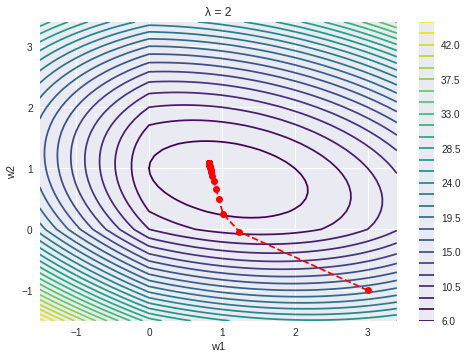

In [163]:
import numpy as np
import matplotlib.pyplot as plt

w1range = np.arange(-1.5, 3.5, 0.1)
w2range = np.arange(-1.5, 3.5, 0.1)
W1range, W2range = np.meshgrid(w1range, w2range)
Loss = np.empty((len(w1range), len(w2range)), dtype=float)
for i, w1 in enumerate(w1range):
  for j, w2 in enumerate(w2range):
    w_ij = np.r_[w1, w2]
    Loss[i, j] = psi(w_ij, A, mu) + Omega(w_ij, lm)
plt.contour(W1range, W2range, Loss, 30, cmap='viridis')

log_w1, log_w2 = np.array(log)[:, 0], np.array(log)[:, 1]
plt.plot(log_w1, log_w2, marker='o', color='red', linestyle='dashed')
plt.title('λ = {}'.format(lm))
plt.xlabel('w1')
plt.ylabel('w2')

plt.colorbar()
plt.show()

### Difference between w and w* got by using cvxopt

     pcost       dcost       gap    pres   dres
 0: -1.0555e+01  1.2220e+00  2e+01  7e+00  6e-01
 1: -2.9404e+00 -5.2607e+00  2e+00  2e-15  3e-16
 2: -4.0711e+00 -4.2062e+00  1e-01  6e-16  6e-17
 3: -4.0907e+00 -4.0921e+00  1e-03  1e-15  2e-16
 4: -4.0909e+00 -4.0909e+00  1e-05  6e-16  2e-16
 5: -4.0909e+00 -4.0909e+00  1e-07  1e-15  2e-16
Optimal solution found.
{'x': <4x1 matrix, tc='d'>, 'y': <0x1 matrix, tc='d'>, 's': <6x1 matrix, tc='d'>, 'z': <6x1 matrix, tc='d'>, 'status': 'optimal', 'gap': 1.3796927298680007e-07, 'relative gap': 3.3725822446645605e-08, 'primal objective': -4.090909071381967, 'dual objective': -4.09090920935124, 'primal infeasibility': 9.984349922312564e-16, 'dual infeasibility': 2.408231213798702e-16, 'primal slack': 3.4514640136687378e-09, 'dual slack': 6.9544281721625134e-09, 'iterations': 5}
[ 8.18e-01]
[ 1.09e+00]
[ 8.18e-01]
[ 1.09e+00]

4.909090928618033


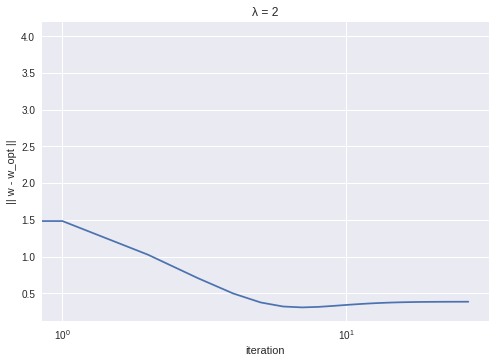

In [164]:
import numpy as np
import matplotlib.pyplot as plt
from cvxopt import matrix
from cvxopt.solvers import qp

# optimize z = [w; v] by using cvxopt
w = np.copy(w_init)

zeros = np.zeros((len(w), len(w)), dtype=float)
tmp = np.c_[np.r_[2*A, zeros], np.r_[zeros, zeros]]
P = matrix(tmp)
tmp = np.r_[-2*mu.T.dot(A), lm*np.ones(len(w))]
q = matrix(tmp)
eye = np.eye(len(w))
tmp = np.r_[np.c_[-eye, -eye], np.c_[eye, -eye], np.c_[zeros, -eye]]
G = matrix(tmp)
tmp = np.zeros(len(w) * 3)
h = matrix(tmp) 
#print('P:\n{}'.format(P))
#print('q:\n{}'.format(q))
#print('G:\n{}'.format(G))
sol = qp(P, q, G=G, h=h)
print(sol)
print(sol['x'])
print(sol['primal objective'] + mu.T.dot(A).dot(mu))

w_opt = np.array(sol['x'][0:2])
diff = [np.linalg.norm(item - w_opt) for item in log]

plt.title('λ = {}'.format(lm))
plt.xscale('log')
plt.xlabel('iteration')
plt.ylabel('|| w - w_opt ||')
plt.plot(np.arange(len(diff)), diff)
plt.show()